# 중간에 test, train dataset (validation 말고) 나누는 것은 엑셀을 건들였음. 구글링 하기 귀찮아서 그냥 엑셀 건듦 

In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from sklearn.model_selection import train_test_split 

# feature engineering

열병합 한 상태로 진행

In [30]:
from os.path import join
df = pd.read_excel('rain_data.xlsx')
df.head()

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,데이터 집단 6,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,1,2006,7,10,8,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.610
1,1,2006,7,10,9,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.600
2,1,2006,7,10,10,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.590
3,1,2006,7,10,11,302.812199,7.3,7,10,7,...,14,2.53,122.620,11.3,9,10,15,14,2.53,122.585
4,1,2006,7,10,12,384.783406,8.2,7,12,8,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575


# 연,월,일,시간 을 datetime format 으로 변경

## 시간 의 경우, datetime 에서 24 를 인식하지 못한다. 비슷한 맥락이므로 -1 을 진행하여 붙힌다

In [31]:
df['시간'] = df['시간']-1
df.head()

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,데이터 집단 6,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,1,2006,7,10,7,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.610
1,1,2006,7,10,8,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.600
2,1,2006,7,10,9,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.590
3,1,2006,7,10,10,302.812199,7.3,7,10,7,...,14,2.53,122.620,11.3,9,10,15,14,2.53,122.585
4,1,2006,7,10,11,384.783406,8.2,7,12,8,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575


## 연 월 일 시간 을 datetime 으로 한번에 붙힌다. 

### dateInt 잘 들어갔는지 확인

In [32]:
df['dateInt']= df['연'].astype(str) + df['월'].astype(str).str.zfill(2)+df['일'].astype(str).str.zfill(2)+df['시간'].astype(str).str.zfill(2)
df['dateInt']

0       2006071007
1       2006071008
2       2006071009
3       2006071010
4       2006071011
           ...    
3046    2018070716
3047    2018070717
3048    2018070718
3049    2018070719
3050    2018070720
Name: dateInt, Length: 3051, dtype: object

### dateInt 를 datetime format 으로 변경하여 Date 라는 칼럼에 저장

In [33]:
df['Date'] = pd.to_datetime(df['dateInt'], format="%Y%m%d%H")
df['Date']

0      2006-07-10 07:00:00
1      2006-07-10 08:00:00
2      2006-07-10 09:00:00
3      2006-07-10 10:00:00
4      2006-07-10 11:00:00
               ...        
3046   2018-07-07 16:00:00
3047   2018-07-07 17:00:00
3048   2018-07-07 18:00:00
3049   2018-07-07 19:00:00
3050   2018-07-07 20:00:00
Name: Date, Length: 3051, dtype: datetime64[ns]

### Date 칼럼이 제일 뒤로 갔으므로 앞으로 당겨서 사용할 것임. insert 사용

In [34]:
df.insert(4, 'date', value = df['Date'])
df.head()

,홍수사상번호,연,월,일,date,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,...,Unnamed: 40,데이터 집단 6,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,dateInt,Date
0,1,2006,7,10,2006-07-10 07:00:00,7,189.100000,6.4,7,7,...,122.660,6.4,7,7,8,8,2.54,122.610,2006071007,2006-07-10 07:00:00
1,1,2006,7,10,2006-07-10 08:00:00,8,216.951962,6.3,7,8,...,122.648,7.3,7,8,10,10,2.53,122.600,2006071008,2006-07-10 08:00:00
2,1,2006,7,10,2006-07-10 09:00:00,9,251.424419,6.4,7,9,...,122.636,8.2,7,9,10,11,2.53,122.590,2006071009,2006-07-10 09:00:00
3,1,2006,7,10,2006-07-10 10:00:00,10,302.812199,7.3,7,10,...,122.620,11.3,9,10,15,14,2.53,122.585,2006071010,2006-07-10 10:00:00
4,1,2006,7,10,2006-07-10 11:00:00,11,384.783406,8.2,7,12,...,122.604,14.4,12,12,18,16,2.53,122.575,2006071011,2006-07-10 11:00:00


### date 라는 칼럼 하나만 사용할 예정이기에, 연,월,일,시간,dateInt, Date 를 drop

In [35]:
df =df.drop(['연','월','일','시간','dateInt','Date'], axis = 1)
df.head()

,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,데이터 집단 6,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,1,2006-07-10 07:00:00,189.100000,6.4,7,7,7,8,2.54,122.56875,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.610
1,1,2006-07-10 08:00:00,216.951962,6.3,7,8,7,8,2.53,122.56250,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.600
2,1,2006-07-10 09:00:00,251.424419,6.4,7,9,7,8,2.53,122.55625,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.590
3,1,2006-07-10 10:00:00,302.812199,7.3,7,10,7,8,2.53,122.55625,...,14,2.53,122.620,11.3,9,10,15,14,2.53,122.585
4,1,2006-07-10 11:00:00,384.783406,8.2,7,12,8,10,2.53,122.55625,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575


# date, 홍수 사상번호 두개 다 index 로 사용해야될 것 같다고 생각. 나중에 시도해 볼것

### date 를 index 로 사용  
#### 해 봤는데, date 로 진행하게 되면 얘가 그래프를 그릴때도, 비어있는 데이터에 대해서 (1,2,3,4,5, 9,10,11,12 월 ) 는 값이 없어서 아예 평균을 내는 현상을 발견함. 
- index 는 date 로 하면 안되는 거 같음. 
- 아... date 데이터 한번 사용해보고 싶었는데... 좀만 더 생각을 해보자. 

In [42]:
# df = df.set_index('date')
# df.head()

# 데이터 집단 1-6 안에 있는 a-e 데이터를 아예 평균을 내서 새로운 feature 로 저장

In [43]:
df['avg_A_waterfall']  = (df['Unnamed: 7']  + df['Unnamed: 14'] +df['Unnamed: 21'] +df['Unnamed: 28'] +df['Unnamed: 35'] +df['Unnamed: 42'])/6
df['avg_B_waterfall']  = (df['Unnamed: 8']  + df['Unnamed: 15'] +df['Unnamed: 22'] +df['Unnamed: 29'] +df['Unnamed: 36'] +df['Unnamed: 43'])/6
df['avg_C_waterfall']  = (df['Unnamed: 9']  + df['Unnamed: 16'] +df['Unnamed: 23'] +df['Unnamed: 30'] +df['Unnamed: 37'] +df['Unnamed: 44'])/6
df['avg_D_waterfall']  = (df['Unnamed: 10'] + df['Unnamed: 17'] +df['Unnamed: 24'] +df['Unnamed: 31'] +df['Unnamed: 38'] +df['Unnamed: 45'])/6
df['avg_D_waterlevel'] = (df['Unnamed: 11'] + df['Unnamed: 18'] +df['Unnamed: 25'] +df['Unnamed: 32'] +df['Unnamed: 39'] +df['Unnamed: 46'])/6
df['avg_E_waterlevel'] = (df['Unnamed: 12'] + df['Unnamed: 19'] +df['Unnamed: 26'] +df['Unnamed: 33'] +df['Unnamed: 40'] +df['Unnamed: 47'])/6
df.head()

,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterfall,avg_D_waterlevel,avg_E_waterlevel
0,1,2006-07-10 07:00:00,0.008630,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,...,0.032389,0.030651,0.093930,0.155313,0.020615,0.019412,0.028967,0.030554,0.093930,0.154805
1,1,2006-07-10 08:00:00,0.009926,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,...,0.040486,0.038314,0.093291,0.154916,0.020615,0.022185,0.032732,0.034376,0.093291,0.154680
2,1,2006-07-10 09:00:00,0.011529,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,...,0.040486,0.042146,0.093291,0.154518,0.020615,0.024958,0.033396,0.036286,0.093291,0.154556
3,1,2006-07-10 10:00:00,0.013919,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,...,0.060729,0.053640,0.093291,0.154320,0.023513,0.027731,0.044801,0.043291,0.093291,0.154479
4,1,2006-07-10 11:00:00,0.017731,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,...,0.072874,0.061303,0.093291,0.153923,0.029839,0.033277,0.052435,0.050293,0.093291,0.154267


# scaling 진행 할 것-----> feature engineering 좀만 더 하다가 사용해보자. 

In [44]:
feature_list = ['유입량','데이터집단 1', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','데이터집단 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','데이터집단 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','데이터 집단 4','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','데이터 집단 5','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','데이터 집단 6','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','avg_A_waterfall', 'avg_B_waterfall', 'avg_C_waterfall', 'avg_D_waterfall', 'avg_D_waterlevel', 'avg_E_waterlevel']

In [45]:
for sth in feature_list:
    norm_inflow = (df[sth]-df[sth].min())/(df[sth].max()-df[sth].min())
    df[sth]=norm_inflow
df.head()

,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterfall,avg_D_waterlevel,avg_E_waterlevel
0,1,2006-07-10 07:00:00,0.008630,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,...,0.032389,0.030651,0.093930,0.155313,0.020888,0.019466,0.030170,0.030908,0.093930,0.155047
1,1,2006-07-10 08:00:00,0.009926,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,...,0.040486,0.038314,0.093291,0.154916,0.020888,0.022247,0.034092,0.034774,0.093291,0.154922
2,1,2006-07-10 09:00:00,0.011529,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,...,0.040486,0.042146,0.093291,0.154518,0.020888,0.025028,0.034783,0.036707,0.093291,0.154798
3,1,2006-07-10 10:00:00,0.013919,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,...,0.060729,0.053640,0.093291,0.154320,0.023826,0.027808,0.046661,0.043794,0.093291,0.154721
4,1,2006-07-10 11:00:00,0.017731,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,...,0.072874,0.061303,0.093291,0.153923,0.030236,0.033370,0.054612,0.050877,0.093291,0.154509


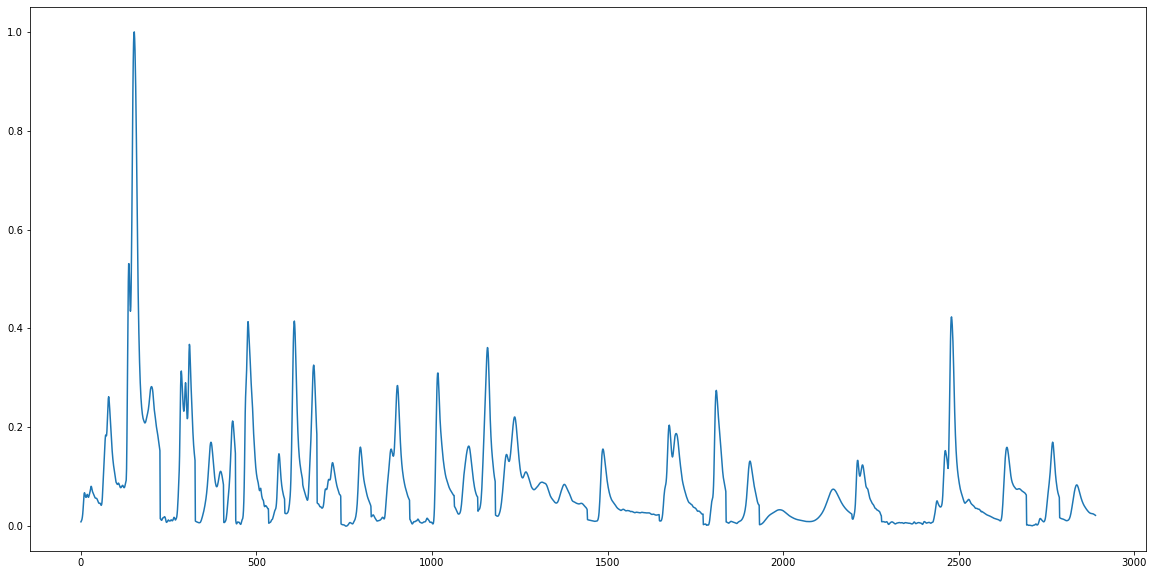

In [46]:
plt.figure(figsize = (20,10))
plt.plot(df['유입량'])

# 만들어 놓은 데이터를 새로운 엑셀 파일로 저장

In [52]:
df.to_excel(excel_writer='0819_datetime_rain_data.xlsx')
df.head()

,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterfall,avg_D_waterlevel,avg_E_waterlevel
0,1,2006-07-10 07:00:00,0.008630,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,...,0.032389,0.030651,0.093930,0.155313,0.020888,0.019466,0.030170,0.030908,0.093930,0.155047
1,1,2006-07-10 08:00:00,0.009926,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,...,0.040486,0.038314,0.093291,0.154916,0.020888,0.022247,0.034092,0.034774,0.093291,0.154922
2,1,2006-07-10 09:00:00,0.011529,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,...,0.040486,0.042146,0.093291,0.154518,0.020888,0.025028,0.034783,0.036707,0.093291,0.154798
3,1,2006-07-10 10:00:00,0.013919,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,...,0.060729,0.053640,0.093291,0.154320,0.023826,0.027808,0.046661,0.043794,0.093291,0.154721
4,1,2006-07-10 11:00:00,0.017731,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,...,0.072874,0.061303,0.093291,0.153923,0.030236,0.033370,0.054612,0.050877,0.093291,0.154509


# index 설정을 안해서 그런가... 이상하게 값이 저장된다... 맨 앞에 있는 0123456789 가 계속해서 생성된다 저장을 할때마다. 

일단은 저장을 할때 첫 row 는 삭제 하는 식으로 진행하자. 

# excel 파일 분할 한 것 표시 일단은 하고, (테스트 용이니) 기존에 사용하던 데이터로 계속 진행. 

## 엑셀파일을 귀찮아서 일단은 임의로 train, test 로 나눴다. 
### train dataset 에는 1~25 까지의 데이터가 존재 하고 
### test dataset 에는 26 만 데이터가 존재 하는 상황이다. 

# 현재 데이터의 총 갯수는 2890 이다. feature 는 51 개

In [58]:
df = pd.read_excel('train(1-25)_scaled_avg.xlsx')
print(df.shape)
df.head()

(2891, 51)


,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterfall,avg_D_waterlevel,avg_E_waterlevel
0,1,2006-7-10 7:00:00,0.008630,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,...,0.032389,0.030651,0.093930,0.155313,0.020875,0.019462,0.030201,0.030908,0.093930,0.155043
1,1,2006-7-10 8:00:00,0.009926,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,...,0.040486,0.038314,0.093291,0.154916,0.020875,0.022243,0.034228,0.034771,0.093291,0.154919
2,1,2006-7-10 9:00:00,0.011529,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,...,0.040486,0.042146,0.093291,0.154518,0.020875,0.025023,0.034899,0.036703,0.093291,0.154795
3,1,2006-7-10 10:00:00,0.013919,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,...,0.060729,0.053640,0.093291,0.154320,0.023857,0.027804,0.046980,0.043786,0.093291,0.154719
4,1,2006-7-10 11:00:00,0.017731,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,...,0.072874,0.061303,0.093291,0.153923,0.030318,0.033364,0.055034,0.050869,0.093291,0.154507


# date 를 index 로 사용하고자 한다. 근데 홍수 사상번호도 index 로 사용해야 되는게 아닌가? 하는 불안감이 있긴한다.  multiindex 라는 것이 있다고 한다. 나중에 필요하면 해당 키워드로 찾아 볼 것 


In [59]:
# df = df.set_index('date')
# df.head()

In [60]:
feature_col = ['데이터집단 1', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','데이터집단 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','데이터집단 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','데이터 집단 4','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','데이터 집단 5','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','데이터 집단 6','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','avg_A_waterfall', 'avg_B_waterfall', 'avg_C_waterfall', 'avg_D_waterfall', 'avg_D_waterlevel', 'avg_E_waterlevel']
label_col = ['유입량']

In [61]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [62]:
# 325 는 홍수 번호 23, 24, 25 를 의미. 일단은 여기에 있는 값을 예측하도록 만들어 보자.
# 홍수 번호 22 까지 train set 으로 설정하고, 23,24,25 는 test set 으로 설정!
TEST_SIZE = 325
train = df[:-TEST_SIZE]
test = df[-TEST_SIZE:]

train_feature = train[feature_col]
train_label = train[label_col]

# train_feature 는 일단 홍수 번호 22 까지만 포함하였다. 

In [63]:
print(len(train_feature),len(train_label))

2566 2566


In [64]:
train_feature

,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,데이터집단 2,Unnamed: 14,Unnamed: 15,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterfall,avg_D_waterlevel,avg_E_waterlevel
0,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,0.019184,0.020772,0.019074,...,0.032389,0.030651,0.093930,0.155313,0.020875,0.019462,0.030201,0.030908,0.093930,0.155043
1,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,0.019488,0.020772,0.021798,...,0.040486,0.038314,0.093291,0.154916,0.020875,0.022243,0.034228,0.034771,0.093291,0.154919
2,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,0.022229,0.020772,0.024523,...,0.040486,0.042146,0.093291,0.154518,0.020875,0.025023,0.034899,0.036703,0.093291,0.154795
3,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,0.024970,0.020772,0.027248,...,0.060729,0.053640,0.093291,0.154320,0.023857,0.027804,0.046980,0.043786,0.093291,0.154719
4,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,0.034409,0.026706,0.032698,...,0.072874,0.061303,0.093291,0.153923,0.030318,0.033364,0.055034,0.050869,0.093291,0.154507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,0.097267,0.136778,0.114441,0.035573,0.026718,0.174441,0.654924,0.097140,0.133531,0.114441,...,0.036437,0.019157,0.174441,0.655412,0.134195,0.116775,0.048322,0.021893,0.174441,0.655578
2562,0.097140,0.136778,0.114441,0.035573,0.019084,0.173163,0.654924,0.097140,0.133531,0.114441,...,0.028340,0.019157,0.173163,0.655412,0.134195,0.113994,0.046980,0.019317,0.173163,0.655628
2563,0.097140,0.136778,0.114441,0.035573,0.019084,0.172524,0.654924,0.097140,0.133531,0.114441,...,0.008097,0.019157,0.172524,0.655412,0.134195,0.113068,0.043624,0.019317,0.172524,0.655678
2564,0.097140,0.136778,0.114441,0.035573,0.019084,0.171885,0.654924,0.097140,0.133531,0.114441,...,0.008097,0.019157,0.171885,0.655412,0.134195,0.113068,0.043624,0.019317,0.171885,0.655728


In [65]:
train_label

,유입량
0,0.008630
1,0.009926
2,0.011529
3,0.013919
4,0.017731
...,...
2561,0.032520
2562,0.031548
2563,0.030498
2564,0.029575


# 여기 윗까지 일단 train_label 이랑, train_feature 를 나누는 것에 성공을 하였다. 

In [66]:
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

In [67]:
print(len(train_feature), len(train_label))

2546 2546


In [68]:
train_label

array([[0.06010701],
       [0.05826407],
       [0.05869976],
       ...,
       [0.03049788],
       [0.0295746 ],
       [0.02901311]])

In [69]:
train_feature

array([[[0.01948843, 0.0212766 , 0.01907357, ..., 0.03090792,
         0.09392971, 0.15504297],
        [0.01918392, 0.0212766 , 0.02179837, ..., 0.03477141,
         0.09329073, 0.15491893],
        [0.01948843, 0.0212766 , 0.02452316, ..., 0.03670316,
         0.09329073, 0.15479488],
        ...,
        [0.17356882, 0.12462006, 0.16621253, ..., 0.23245332,
         0.18913738, 0.15296667],
        [0.1772229 , 0.12462006, 0.16893733, ..., 0.23438506,
         0.19744409, 0.15393783],
        [0.18087698, 0.13069909, 0.17166213, ..., 0.23889247,
         0.20127796, 0.15519928]],

       [[0.01918392, 0.0212766 , 0.02179837, ..., 0.03477141,
         0.09329073, 0.15491893],
        [0.01948843, 0.0212766 , 0.02452316, ..., 0.03670316,
         0.09329073, 0.15479488],
        [0.02222899, 0.0212766 , 0.02724796, ..., 0.04378622,
         0.09329073, 0.15471886],
        ...,
        [0.1772229 , 0.12462006, 0.16893733, ..., 0.23438506,
         0.19744409, 0.15393783],
        [0.1

In [70]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=633)
print("x_train.shape", "x_valid.shape")
print(x_train.shape, x_valid.shape)
print("y_train, y_valid")
print(y_train.shape, y_valid.shape)
#(1981, 20, 48) (850, 20, 48)

test_feature = test[feature_col]
test_label = test[label_col]



# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
print("test_feature.shape, test_label.shape")
print(test_feature.shape, test_label.shape)
# ((180, 20, 4), (180, 1))

x_train.shape x_valid.shape
(1913, 20, 48) (633, 20, 48)
y_train, y_valid
(1913, 1) (633, 1)
test_feature.shape, test_label.shape
(305, 20, 48) (305, 1)


# 아 train_featureshape[1] 이라는게 time step 을 의미하는 것인가? 


In [71]:
print(train_feature.shape[0])
print(train_feature.shape[1])

2546
20


In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
import tensorflow as tf

model = Sequential()
model.add(LSTM(20,input_shape=(train_feature.shape[1], train_feature.shape[2]),activation='relu',return_sequences=False))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics = ['accuracy'])

# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# filename = os.path.join('tmp_checkpoint.h5')
# checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 20)                5520      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 5,541
Trainable params: 5,541
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import os
from os.path import join
from tensorflow.keras.optimizers import RMSprop
# opt = RMSprop(lr=0.001)

model.compile(loss='mean_squared_error', optimizer = 'adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# history = model.fit(x_train, y_train, 
#                     epochs=5000, 
#                     batch_size=16,
#                     verbose = 1,
#                     validation_data=(x_valid, y_valid),
#                     callbacks=[early_stop, checkpoint])  
history = model.fit(x_train, y_train, 
                    epochs=5000, 
                    batch_size=16,
                    verbose = 1,
                    validation_data=(x_valid, y_valid)) 

Epoch 1/5000
120/120 [==============================] - 3s 10ms/step - loss: 3.5196e-04 - val_loss: 4.4203e-04
Epoch 2/5000
120/120 [==============================] - 1s 5ms/step - loss: 3.6318e-04 - val_loss: 4.6306e-04
Epoch 3/5000
120/120 [==============================] - 1s 4ms/step - loss: 3.8488e-04 - val_loss: 3.6693e-04
Epoch 4/5000
120/120 [==============================] - 1s 5ms/step - loss: 3.3784e-04 - val_loss: 3.8622e-04
Epoch 5/5000
120/120 [==============================] - 1s 5ms/step - loss: 3.6098e-04 - val_loss: 3.9062e-04
Epoch 6/5000
120/120 [==============================] - 1s 5ms/step - loss: 3.4358e-04 - val_loss: 3.6557e-04
Epoch 7/5000
120/120 [==============================] - 1s 5ms/step - loss: 3.5911e-04 - val_loss: 4.9282e-04
Epoch 8/5000
120/120 [==============================] - 1s 5ms/step - loss: 2.7402e-04 - val_loss: 5.3534e-04
Epoch 9/5000
120/120 [==============================] - 1s 5ms/step - loss: 4.0871e-04 - val_loss: 3.2161e-04
Epoch 10/

Epoch 75/5000
120/120 [==============================] - 1s 5ms/step - loss: 1.7190e-04 - val_loss: 2.7676e-04
Epoch 76/5000
120/120 [==============================] - 1s 6ms/step - loss: 1.7037e-04 - val_loss: 2.5177e-04
Epoch 77/5000
120/120 [==============================] - 1s 5ms/step - loss: 1.6583e-04 - val_loss: 4.3416e-04
Epoch 78/5000
120/120 [==============================] - 1s 5ms/step - loss: 2.3799e-04 - val_loss: 2.4146e-04
Epoch 79/5000
120/120 [==============================] - 1s 5ms/step - loss: 1.9942e-04 - val_loss: 4.7166e-04
Epoch 80/5000
120/120 [==============================] - 1s 6ms/step - loss: 1.8139e-04 - val_loss: 2.7473e-04
Epoch 81/5000
120/120 [==============================] - 1s 6ms/step - loss: 1.5849e-04 - val_loss: 2.7781e-04
Epoch 82/5000
120/120 [==============================] - 1s 5ms/step - loss: 1.8262e-04 - val_loss: 2.7467e-04
Epoch 83/5000
120/120 [==============================] - 1s 5ms/step - loss: 1.6349e-04 - val_loss: 2.6275e-04
E

120/120 [==============================] - 1s 6ms/step - loss: 1.5806e-04 - val_loss: 2.0471e-04
Epoch 149/5000
120/120 [==============================] - 1s 5ms/step - loss: 9.4648e-05 - val_loss: 2.1845e-04
Epoch 150/5000
120/120 [==============================] - 1s 5ms/step - loss: 1.1688e-04 - val_loss: 1.7266e-04
Epoch 151/5000
120/120 [==============================] - 1s 5ms/step - loss: 8.1655e-05 - val_loss: 2.0891e-04
Epoch 152/5000
120/120 [==============================] - 1s 5ms/step - loss: 1.1006e-04 - val_loss: 1.8074e-04
Epoch 153/5000
120/120 [==============================] - 1s 5ms/step - loss: 1.4942e-04 - val_loss: 2.7214e-04
Epoch 154/5000
120/120 [==============================] - 1s 5ms/step - loss: 1.7614e-04 - val_loss: 1.9968e-04
Epoch 155/5000
120/120 [==============================] - 1s 5ms/step - loss: 9.2773e-05 - val_loss: 1.8882e-04
Epoch 156/5000
120/120 [==============================] - 1s 5ms/step - loss: 8.9203e-05 - val_loss: 2.3511e-04
Epoch 1

120/120 [==============================] - 1s 5ms/step - loss: 7.4226e-05 - val_loss: 1.9683e-04
Epoch 222/5000
120/120 [==============================] - 1s 5ms/step - loss: 7.2917e-05 - val_loss: 1.6857e-04
Epoch 223/5000
120/120 [==============================] - 1s 5ms/step - loss: 7.0659e-05 - val_loss: 1.9174e-04
Epoch 224/5000
120/120 [==============================] - 1s 5ms/step - loss: 9.3812e-05 - val_loss: 1.9654e-04
Epoch 225/5000
120/120 [==============================] - 1s 5ms/step - loss: 7.5554e-05 - val_loss: 2.2823e-04
Epoch 226/5000
120/120 [==============================] - 1s 5ms/step - loss: 1.1766e-04 - val_loss: 2.1071e-04
Epoch 227/5000
120/120 [==============================] - 1s 5ms/step - loss: 1.0967e-04 - val_loss: 1.7235e-04
Epoch 228/5000
120/120 [==============================] - 1s 5ms/step - loss: 7.7182e-05 - val_loss: 2.0081e-04
Epoch 229/5000
120/120 [==============================] - 1s 5ms/step - loss: 7.3403e-05 - val_loss: 1.6151e-04
Epoch 2

120/120 [==============================] - 1s 5ms/step - loss: 6.4423e-05 - val_loss: 1.3206e-04
Epoch 295/5000
120/120 [==============================] - 1s 5ms/step - loss: 7.3810e-05 - val_loss: 1.3476e-04
Epoch 296/5000
120/120 [==============================] - 1s 5ms/step - loss: 9.1047e-05 - val_loss: 1.3695e-04
Epoch 297/5000
120/120 [==============================] - 1s 5ms/step - loss: 5.9714e-05 - val_loss: 1.5066e-04
Epoch 298/5000
120/120 [==============================] - 1s 6ms/step - loss: 5.4974e-05 - val_loss: 1.5010e-04
Epoch 299/5000
120/120 [==============================] - 1s 5ms/step - loss: 7.5284e-05 - val_loss: 1.4002e-04
Epoch 300/5000
120/120 [==============================] - 1s 5ms/step - loss: 5.6228e-05 - val_loss: 1.4459e-04
Epoch 301/5000
120/120 [==============================] - 1s 5ms/step - loss: 6.4320e-05 - val_loss: 1.3336e-04
Epoch 302/5000
120/120 [==============================] - 1s 5ms/step - loss: 7.5331e-05 - val_loss: 1.3658e-04
Epoch 3

120/120 [==============================] - 1s 5ms/step - loss: 6.2804e-05 - val_loss: 1.4181e-04
Epoch 368/5000
120/120 [==============================] - 1s 5ms/step - loss: 6.5583e-05 - val_loss: 2.2251e-04
Epoch 369/5000
120/120 [==============================] - 1s 5ms/step - loss: 7.9136e-05 - val_loss: 1.4842e-04
Epoch 370/5000
120/120 [==============================] - 1s 5ms/step - loss: 5.5814e-05 - val_loss: 1.5893e-04
Epoch 371/5000
120/120 [==============================] - 1s 5ms/step - loss: 9.8354e-05 - val_loss: 1.2840e-04
Epoch 372/5000
120/120 [==============================] - 1s 5ms/step - loss: 4.7911e-05 - val_loss: 1.4249e-04
Epoch 373/5000
120/120 [==============================] - 1s 5ms/step - loss: 5.5608e-05 - val_loss: 1.3270e-04
Epoch 374/5000
120/120 [==============================] - 1s 5ms/step - loss: 6.6498e-05 - val_loss: 1.5218e-04
Epoch 375/5000
120/120 [==============================] - 1s 5ms/step - loss: 7.8555e-05 - val_loss: 1.4654e-04
Epoch 3

In [ ]:
model.load_weights(filename)
pred = model.predict(test_feature)

# RMSE 뽑아 내기 

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test_label,pred)**0.5
RMSE

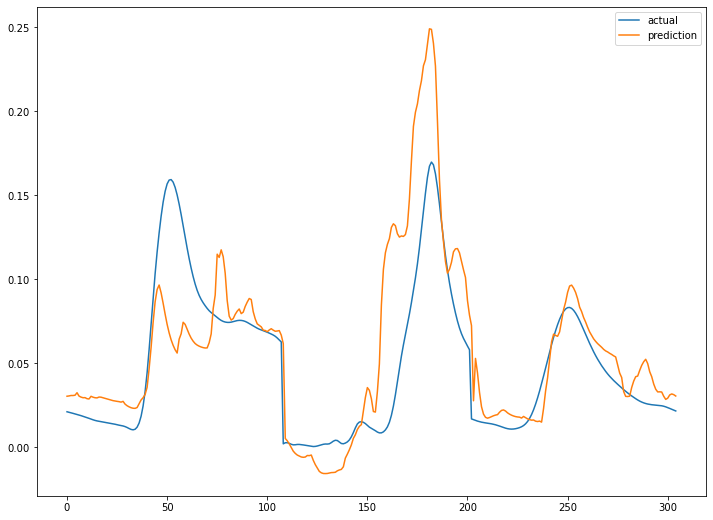

In [87]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()